<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211102_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5277 - accuracy: 0.8104 - val_loss: 0.3364 - val_accuracy: 0.8763
Epoch 2/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3459 - accuracy: 0.8774 - val_loss: 0.2786 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2956 - accuracy: 0.8941 - val_loss: 0.2513 - val_accuracy: 0.9057
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2653 - accuracy: 0.9032 - val_loss: 0.2358 - val_accuracy: 0.9120
Epoch 5/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2412 - accuracy: 0.9114 - val_loss: 0.2271 - val_accuracy: 0.9164
Epoch 6/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2188 - accuracy: 0.9195 - val_loss: 0.2222 - val_accuracy: 0.9166
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2020 - accuracy: 0.9256 - val_loss: 0.2132 -

In [5]:
from tensorflow import keras
model= keras.models.load_model('best-cnn-model.h5')

In [6]:
model.layers

In [7]:
conv= model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
conv_weights= conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.017710268 0.23978287


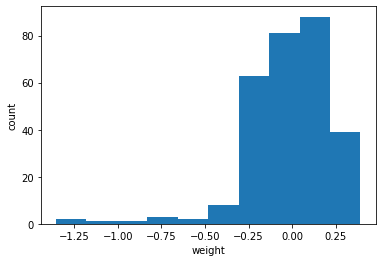

In [9]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

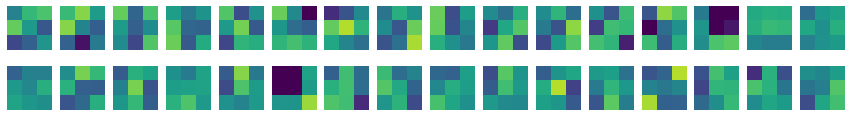

In [10]:
fig, axs= plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [11]:
no_training_model= keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv= no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights= no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.00092592835 0.08130785


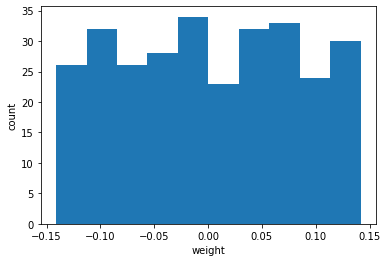

In [13]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

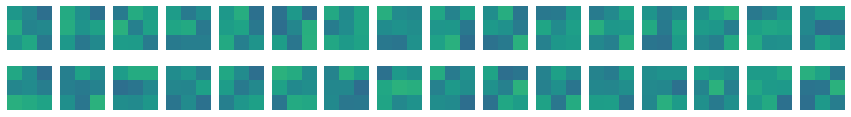

In [14]:
fig, axs=plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [48]:
dense1=keras.layers.Dense(100, activation='sigmoid')
dense2=keras.layers.Dense(10, activation='softmax')

In [49]:
inputs= keras.Input(shape=(784,))

In [50]:
hidden=dense1(inputs)

In [51]:
outputs=dense2(hidden)

In [52]:
model=keras.Model(inputs, outputs)

In [15]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [16]:
conv_acti=keras.Model(model.input, model.layers[0].output)

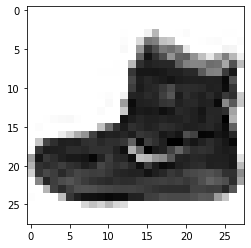

In [17]:
(train_input, train_target), (test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [18]:
inputs= train_input[:1].reshape(-1,28,28,1)/ 255.0
feature_maps= conv_acti.predict(inputs)

In [19]:
print(feature_maps.shape)

(1, 28, 28, 32)


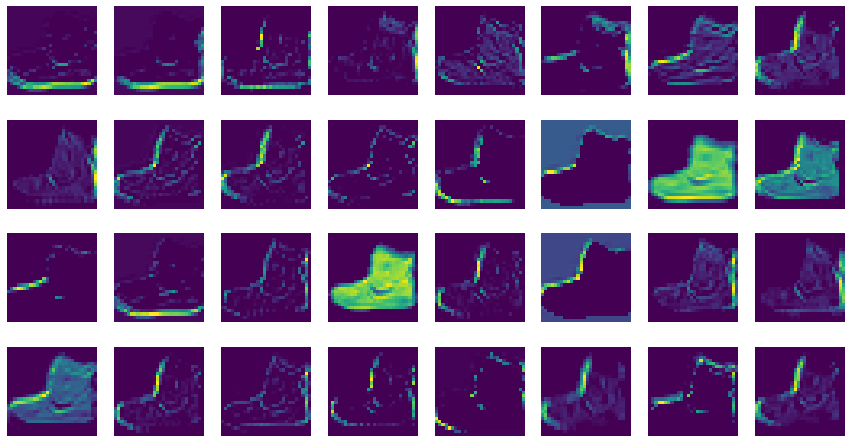

In [21]:
fig, axs= plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [22]:
conv2_acti=keras.Model(model.input, model.layers[2].output)

In [23]:
inputs=train_input[:1].reshape(-1,28,28,1)/255.0
feature_maps= conv2_acti.predict(inputs)

In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


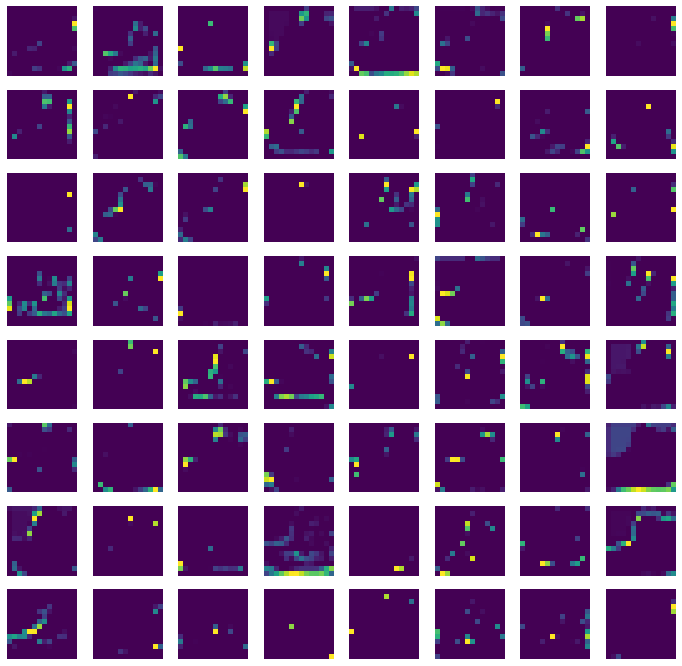

In [33]:
fig, axs= plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()